# Post covid-19 job analysis in Michigan

This note book analyses the job postings in MI area as by August 2020. The Data Scientist job postings were extracted from indeed.com.  

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('indeed_job_listings_DS_MI_08_23.csv')

In [6]:
df.head()

,Title,Company,Location,Link,Review,Salary,Description
0,Senior Data Visualization Engineer,Mathematica Policy Research,"Ann Arbor, MI",https://www.indeed.com/rc/clk?jk=c1b417080530d...,3.8,None,Position Description:\n\nMathematica applies e...
1,Big Data Engineer - 100% REMOTE!,Tech Quarry,None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,$75 - $115 an hour,"**Absolutely No 3rd parties / No C2C, please**..."
2,Senior Data Engineer,Koddi,"Ann Arbor, MI 48108",https://www.indeed.com/rc/clk?jk=88480da53df38...,None,None,Passionate about development in leading techno...
3,GDI&A - Data Operations Analyst,Ford Motor Company,"Dearborn, MI",https://www.indeed.com/rc/clk?jk=6c095e602c9be...,4.1,None,Job Description:\n\nWe are trusted advisers en...
4,CX Data Scientist,Ford Motor Company,"Dearborn, MI",https://www.indeed.com/rc/clk?jk=6f22db9173e21...,4.1,None,Position Overview / Description\n\nAt Ford Mot...


###  Checking any Duplicate job postings

The combined 'job title' and 'company' are grouped and checked for the dupliates. DataFrames provide convinient groupby functionality for this specific task.

In [151]:
df[['Company','Title']]

,Company,Title
0,Mathematica Policy Research,Senior Data Visualization Engineer
1,Tech Quarry,Big Data Engineer - 100% REMOTE!
2,Koddi,Senior Data Engineer
3,Ford Motor Company,GDI&A - Data Operations Analyst
4,Ford Motor Company,CX Data Scientist
5,"Alteryx, Inc.",Sr. Data Scientist
6,BNP Media,Data Engineer
7,Lifesprk,Senior Staff Data Scientist
8,Guardian Glass,Data Scientist
9,BCS Data Center Operations,Data Center Engineer


In [155]:
title_company_pairs=df.groupby(['Title','Company']).groups
length_of_groups=len(set(title_company_pairs.keys()))
length_of_groups==df.shape[0]

True

The number of unique jobtitles(from each compny) is equal to total number of records in the data frame, which says there are no duplicate records. 

## The unique job openings posted by each company

Next, the distribution of job postings from each company will be analyzed.

In [157]:
import numpy as np

In [162]:
company_grouped = df.groupby('Company')
agg_job_nu_table=company_grouped.agg(np.size)[['Title']]

In [163]:
type(agg_job_nu_table)

pandas.core.frame.DataFrame

Renaming the number of jobs column, sorting the table.

In [187]:
agg_job_nu_table.columns=['Nu of jobs']
agg_job_nu_table.sort_values(by=['Nu of jobs'],inplace=True, ascending='False') # inplace=True will sort the original dataframe, agg_job_nu_table

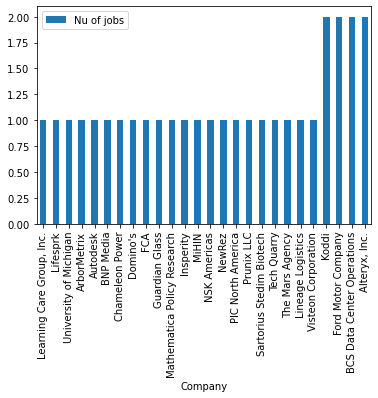

In [188]:
agg_job_nu_table.plot( y='Nu of jobs', kind = 'bar')

## Seperate the city names and representing them as the location

In [7]:
cities=df.Location

In [8]:
cities

0            Ann Arbor, MI
1                     None
2      Ann Arbor, MI 48108
3             Dearborn, MI
4             Dearborn, MI
5            Ann Arbor, MI
6                     None
7                     None
8       Carleton, MI 48117
9            Ann Arbor, MI
10           Ann Arbor, MI
11     Ann Arbor, MI 48105
12          Novi, MI 48377
13          Novi, MI 48375
14    Southfield, MI 48033
15     Ann Arbor, MI 48104
16           Ann Arbor, MI
17     Ann Arbor, MI 48108
18     Ann Arbor, MI 48106
19                    None
20    Southfield, MI 48033
21                    None
22                    None
23                Novi, MI
24          Novi, MI 48375
25           Ann Arbor, MI
26           Ann Arbor, MI
27     Van Buren, MI 48111
28     Ann Arbor, MI 48105
29                    None
Name: Location, dtype: object

In [9]:
lst= [thing.split(',') for thing in cities]

In [10]:
len(lst)

30

In [11]:
lst

[['Ann Arbor', ' MI'],
 ['None'],
 ['Ann Arbor', ' MI 48108'],
 ['Dearborn', ' MI'],
 ['Dearborn', ' MI'],
 ['Ann Arbor', ' MI'],
 ['None'],
 ['None'],
 ['Carleton', ' MI 48117'],
 ['Ann Arbor', ' MI'],
 ['Ann Arbor', ' MI'],
 ['Ann Arbor', ' MI 48105'],
 ['Novi', ' MI 48377'],
 ['Novi', ' MI 48375'],
 ['Southfield', ' MI 48033'],
 ['Ann Arbor', ' MI 48104'],
 ['Ann Arbor', ' MI'],
 ['Ann Arbor', ' MI 48108'],
 ['Ann Arbor', ' MI 48106'],
 ['None'],
 ['Southfield', ' MI 48033'],
 ['None'],
 ['None'],
 ['Novi', ' MI'],
 ['Novi', ' MI 48375'],
 ['Ann Arbor', ' MI'],
 ['Ann Arbor', ' MI'],
 ['Van Buren', ' MI 48111'],
 ['Ann Arbor', ' MI 48105'],
 ['None']]

In [12]:
cities=[]
for ele in lst:
    cities.append(str(ele[0]))
    

In [13]:
cities

['Ann Arbor',
 'None',
 'Ann Arbor',
 'Dearborn',
 'Dearborn',
 'Ann Arbor',
 'None',
 'None',
 'Carleton',
 'Ann Arbor',
 'Ann Arbor',
 'Ann Arbor',
 'Novi',
 'Novi',
 'Southfield',
 'Ann Arbor',
 'Ann Arbor',
 'Ann Arbor',
 'Ann Arbor',
 'None',
 'Southfield',
 'None',
 'None',
 'Novi',
 'Novi',
 'Ann Arbor',
 'Ann Arbor',
 'Van Buren',
 'Ann Arbor',
 'None']

In [14]:
location=[]
for city in cities:
    temp_lst=(city.split())
    city=""
    for inner_ele in temp_lst:
        if inner_ele == 'MI':
            break
            
        city+=(str(inner_ele))
    location.append(city) 

In [15]:
location

['AnnArbor',
 'None',
 'AnnArbor',
 'Dearborn',
 'Dearborn',
 'AnnArbor',
 'None',
 'None',
 'Carleton',
 'AnnArbor',
 'AnnArbor',
 'AnnArbor',
 'Novi',
 'Novi',
 'Southfield',
 'AnnArbor',
 'AnnArbor',
 'AnnArbor',
 'AnnArbor',
 'None',
 'Southfield',
 'None',
 'None',
 'Novi',
 'Novi',
 'AnnArbor',
 'AnnArbor',
 'VanBuren',
 'AnnArbor',
 'None']

In [16]:
len(location)

30

In [17]:
df=df.assign(Location= location) 

In [18]:
df

,Title,Company,Location,Link,Review,Salary,Description
0,Senior Data Visualization Engineer,Mathematica Policy Research,AnnArbor,https://www.indeed.com/rc/clk?jk=c1b417080530d...,3.8,None,Position Description:\n\nMathematica applies e...
1,Big Data Engineer - 100% REMOTE!,Tech Quarry,None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,$75 - $115 an hour,"**Absolutely No 3rd parties / No C2C, please**..."
2,Senior Data Engineer,Koddi,AnnArbor,https://www.indeed.com/rc/clk?jk=88480da53df38...,None,None,Passionate about development in leading techno...
3,GDI&A - Data Operations Analyst,Ford Motor Company,Dearborn,https://www.indeed.com/rc/clk?jk=6c095e602c9be...,4.1,None,Job Description:\n\nWe are trusted advisers en...
4,CX Data Scientist,Ford Motor Company,Dearborn,https://www.indeed.com/rc/clk?jk=6f22db9173e21...,4.1,None,Position Overview / Description\n\nAt Ford Mot...
5,Sr. Data Scientist,"Alteryx, Inc.",AnnArbor,https://www.indeed.com/rc/clk?jk=c45ba03809607...,4.0,None,About Alteryx\nAlteryx develops software for d...
6,Data Engineer,BNP Media,None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.7,"$55,000 - $60,000 a year",Job Description: This individual will serve as...
7,Senior Staff Data Scientist,Lifesprk,None,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.5,None,Lifesprk’s product and engineering team is gro...
8,Data Scientist,Guardian Glass,Carleton,https://www.indeed.com/rc/clk?jk=cd351faea7d52...,3.4,None,Description\nGlobal Data and Analytics Group i...
9,Data Center Engineer,BCS Data Center Operations,AnnArbor,https://www.indeed.com/company/BCS-Data-Center...,None,None,"WHY EMPLOYEES SAY BCS IS A GREAT WORKPLACE:\n""..."


Separating Ann Arbor Jon listings

In [19]:
df[df.Location=="AnnArbor"]

,Title,Company,Location,Link,Review,Salary,Description
0,Senior Data Visualization Engineer,Mathematica Policy Research,AnnArbor,https://www.indeed.com/rc/clk?jk=c1b417080530d...,3.8,None,Position Description:\n\nMathematica applies e...
2,Senior Data Engineer,Koddi,AnnArbor,https://www.indeed.com/rc/clk?jk=88480da53df38...,None,None,Passionate about development in leading techno...
5,Sr. Data Scientist,"Alteryx, Inc.",AnnArbor,https://www.indeed.com/rc/clk?jk=c45ba03809607...,4.0,None,About Alteryx\nAlteryx develops software for d...
9,Data Center Engineer,BCS Data Center Operations,AnnArbor,https://www.indeed.com/company/BCS-Data-Center...,None,None,"WHY EMPLOYEES SAY BCS IS A GREAT WORKPLACE:\n""..."
10,Chief Engineer - Data Center,BCS Data Center Operations,AnnArbor,https://www.indeed.com/company/BCS-Data-Center...,None,None,"WHY EMPLOYEES SAY BCS IS A GREAT WORKPLACE:\n""..."
11,Business Analyst,NSK Americas,AnnArbor,https://www.indeed.com/rc/clk?jk=3ff26aa9ead53...,3.5,None,Responsibilities:\nApply analytical tools to d...
15,Data Scientist,ArborMetrix,AnnArbor,https://www.indeed.com/rc/clk?jk=ed996cae30b13...,4.5,None,Company Description\nArborMetrix advances heal...
16,Instructional Aide (TEMP) - Masters of Applied...,University of Michigan,AnnArbor,https://www.indeed.com/rc/clk?jk=ed1e2c49c0481...,4.3,$18 an hour,How to Apply\nA cover letter is required for c...
17,Data Scientist,Koddi,AnnArbor,https://www.indeed.com/rc/clk?jk=f73efbd3afffd...,None,None,Passionate about development in leading techno...
18,Machine Learning Engineer,Domino's,AnnArbor,https://www.indeed.com/rc/clk?jk=4976a02cc7603...,3.6,None,"Domino’s, which began in 1960 as a single stor..."


## Find the listed skills for each job posting

As an example, take the first job description and develop an algorithm to ectract the listed skills in each job description. The job description text of the first job listed in the data frame is shown below.

In [20]:
job_description=df.iloc[0,6]

In [21]:
job_description

'Position Description:\n\nMathematica applies expertise at the intersection of data, methods, policy, and practice to improve well-being around the world. We collaborate closely with public- and private-sector partners to translate big questions into deep insights that improve programs, refine strategies, and enhance understanding. Our work yields actionable information to guide decisions in wide-ranging policy areas, from health, education, early childhood, and family support to nutrition, employment, disability, and international development.\nMathematica is expanding its ability to deliver the results of its analytic work through interactive, web-based interfaces. The web development group is hiring a Senior Data Visualization Engineer who can both lead design efforts on both internal and public-facing products and contribute to their development. This position requires the candidate to have an expert level of understanding of data visualization design and implementation. The primar

In [22]:
skills_pool=[]

In [23]:
job_description_b=df.iloc[7,6]

In [24]:
job_description_b

"Lifesprk’s product and engineering team is growing! We are having great success building custom solutions for our teammates in order to bring to light the first ever Life Experience Alternative Delivery System (LEADS). Our focus, and our passion, is Lifecare, not just healthcare. Come join us and be part of building something truly meaningful from the ground up with a diverse team of committed, humble, awesome people. All fully distributed from anywhere in the country!\n\nLifesprk, headquartered in Minneapolis (with our head of engineering in Boulder Colorado), has been sparking lives for 15 years and it is time to take our “Whole Person Senior Care” model to a greater and greater reach. And to do that, we need you to come and build the “best in class” platform for whole person health.\n\nAs our most senior data scientist you will provider leadership across our data science and analytics efforts. With your expertise we will create predictive insights to support LEADS. In this new role

In [57]:
import re
def txtToWords(strng):
    words = re.split(r'\W+',strng)
    words = [word.lower() for word in words]
    
    return words
    
    
words=txtToWords(job_description_b)
print(words)

['lifesprk', 's', 'product', 'and', 'engineering', 'team', 'is', 'growing', 'we', 'are', 'having', 'great', 'success', 'building', 'custom', 'solutions', 'for', 'our', 'teammates', 'in', 'order', 'to', 'bring', 'to', 'light', 'the', 'first', 'ever', 'life', 'experience', 'alternative', 'delivery', 'system', 'leads', 'our', 'focus', 'and', 'our', 'passion', 'is', 'lifecare', 'not', 'just', 'healthcare', 'come', 'join', 'us', 'and', 'be', 'part', 'of', 'building', 'something', 'truly', 'meaningful', 'from', 'the', 'ground', 'up', 'with', 'a', 'diverse', 'team', 'of', 'committed', 'humble', 'awesome', 'people', 'all', 'fully', 'distributed', 'from', 'anywhere', 'in', 'the', 'country', 'lifesprk', 'headquartered', 'in', 'minneapolis', 'with', 'our', 'head', 'of', 'engineering', 'in', 'boulder', 'colorado', 'has', 'been', 'sparking', 'lives', 'for', '15', 'years', 'and', 'it', 'is', 'time', 'to', 'take', 'our', 'whole', 'person', 'senior', 'care', 'model', 'to', 'a', 'greater', 'and', 'grea

In [83]:
skills_pool=['sql','pig','hive', 'spark','python', 'scala', 'java', 'linux',  'lake', 'hadoop',  'structures','tableau',  
              'aws', 'azure','cloudera', 'snowflake', 'mysql', 'nosql','mapreduce','alteryx', 'javascript', 'html', 'css',
            'rshiny','r', 'sas', 'hdfs', 'oracle','ststistical modeling techniques','clustering','classification','regression','tree based methods','SVM']

In [27]:
job_description

'Position Description:\n\nMathematica applies expertise at the intersection of data, methods, policy, and practice to improve well-being around the world. We collaborate closely with public- and private-sector partners to translate big questions into deep insights that improve programs, refine strategies, and enhance understanding. Our work yields actionable information to guide decisions in wide-ranging policy areas, from health, education, early childhood, and family support to nutrition, employment, disability, and international development.\nMathematica is expanding its ability to deliver the results of its analytic work through interactive, web-based interfaces. The web development group is hiring a Senior Data Visualization Engineer who can both lead design efforts on both internal and public-facing products and contribute to their development. This position requires the candidate to have an expert level of understanding of data visualization design and implementation. The primar

In [84]:
skills_freq_tot=dict((el,1) for el in skills_pool)

In [85]:
def skillFreq(words):

    skills_freq= [words.count(word) for word in skills_pool]
    
    return dict(list(zip(skills_pool,skills_freq)))
        

In [86]:
print(skillFreq(words))


{'sql': 0, 'pig': 0, 'hive': 0, 'spark': 1, 'python': 2, 'scala': 0, 'java': 1, 'linux': 0, 'lake': 1, 'hadoop': 1, 'structures': 1, 'tableau': 0, 'aws': 0, 'azure': 0, 'cloudera': 0, 'snowflake': 0, 'mysql': 0, 'nosql': 0, 'mapreduce': 0, 'alteryx': 0, 'javascript': 0, 'html': 0, 'css': 0, 'rshiny': 0, 'r': 1, 'sas': 0, 'hdfs': 0, 'oracle': 0, 'ststistical modeling techniques': 0, 'clustering': 1, 'classification': 1, 'regression': 0, 'tree based methods': 0, 'SVM': 0}


In [87]:
from collections import Counter

In [88]:
skills_freq_tot=Counter(skills_freq_tot)+Counter(skillFreq(words))

In [89]:
skills_freq_tot

Counter({'sql': 1,
         'pig': 1,
         'hive': 1,
         'spark': 2,
         'python': 3,
         'scala': 1,
         'java': 2,
         'linux': 1,
         'lake': 2,
         'hadoop': 2,
         'structures': 2,
         'tableau': 1,
         'aws': 1,
         'azure': 1,
         'cloudera': 1,
         'snowflake': 1,
         'mysql': 1,
         'nosql': 1,
         'mapreduce': 1,
         'alteryx': 1,
         'javascript': 1,
         'html': 1,
         'css': 1,
         'rshiny': 1,
         'r': 2,
         'sas': 1,
         'hdfs': 1,
         'oracle': 1,
         'ststistical modeling techniques': 1,
         'clustering': 2,
         'classification': 2,
         'regression': 1,
         'tree based methods': 1,
         'SVM': 1})

In [90]:
df.shape

(30, 7)

In [91]:
skills_freq_tot=dict((el,1) for el in skills_pool)
for i in range(df.shape[0]):
    
    job_description= (df.iloc[i,6])
    words=txtToWords(job_description)
    skills_freq_tot=Counter(skills_freq_tot)+Counter(skillFreq(words))
# sorting the dict
skills_freq_tot={k: v for k, v in sorted(skills_freq_tot.items(), key=lambda item: item[1], reverse=True)}

In [92]:
skills_freq_tot

{'python': 27,
 'sql': 23,
 'tableau': 19,
 'r': 18,
 'alteryx': 17,
 'aws': 16,
 'spark': 14,
 'java': 11,
 'hive': 10,
 'hadoop': 10,
 'scala': 9,
 'hdfs': 8,
 'classification': 8,
 'linux': 7,
 'lake': 7,
 'structures': 6,
 'nosql': 6,
 'regression': 6,
 'pig': 5,
 'snowflake': 5,
 'mapreduce': 5,
 'sas': 5,
 'clustering': 5,
 'azure': 4,
 'cloudera': 4,
 'html': 3,
 'mysql': 2,
 'javascript': 2,
 'css': 2,
 'rshiny': 2,
 'oracle': 2,
 'ststistical modeling techniques': 1,
 'tree based methods': 1,
 'SVM': 1}

In [122]:
total = df.shape[0]
skills_prec_tot = {k: round((v / total)*100) for k, v in skills_freq_tot.items()}

In [123]:
skills_prec_tot

{'python': 90,
 'sql': 77,
 'tableau': 63,
 'r': 60,
 'alteryx': 57,
 'aws': 53,
 'spark': 47,
 'java': 37,
 'hive': 33,
 'hadoop': 33,
 'scala': 30,
 'hdfs': 27,
 'classification': 27,
 'linux': 23,
 'lake': 23,
 'structures': 20,
 'nosql': 20,
 'regression': 20,
 'pig': 17,
 'snowflake': 17,
 'mapreduce': 17,
 'sas': 17,
 'clustering': 17,
 'azure': 13,
 'cloudera': 13,
 'html': 10,
 'mysql': 7,
 'javascript': 7,
 'css': 7,
 'rshiny': 7,
 'oracle': 7,
 'ststistical modeling techniques': 3,
 'tree based methods': 3,
 'SVM': 3}

In [124]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x26af4095b88>,
 [Text(0, 0, 'python'),
  Text(0, 0, 'sql'),
  Text(0, 0, 'tableau'),
  Text(0, 0, 'r'),
  Text(0, 0, 'alteryx'),
  Text(0, 0, 'aws'),
  Text(0, 0, 'spark'),
  Text(0, 0, 'java'),
  Text(0, 0, 'hive'),
  Text(0, 0, 'hadoop'),
  Text(0, 0, 'scala'),
  Text(0, 0, 'hdfs'),
  Text(0, 0, 'classification'),
  Text(0, 0, 'linux'),
  Text(0, 0, 'lake'),
  Text(0, 0, 'structures'),
  Text(0, 0, 'nosql'),
  Text(0, 0, 'regression'),
  Text(0, 0, 'pig'),
  Text(0, 0, 'snowflake'),
  Text(0, 0, 'mapreduce'),
  Text(0, 0, 'sas'),
  Text(0, 0, 'clustering'),
  Text(0, 0, 'azure'),
  Text(0, 0, 'cloudera'),
  Text(0, 0, 'html'),
  Text(0, 0, 'mysql'),
  Text(0, 0, 'javascript'),
  Text(0, 0, 'css'),
  Text(0, 0, 'rshiny'),
  Text(0, 0, 'oracle'),
  Text(0, 0, 'ststistical modeling techniques'),
  Text(0, 0, 'tree based methods'),
  Text(0, 0, 'SVM')])

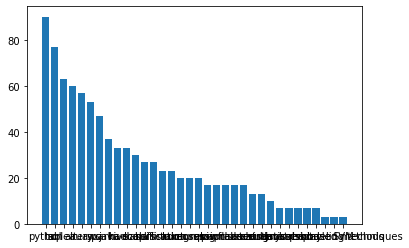

In [125]:
plt.bar(range(len(skills_prec_tot)), list(skills_prec_tot.values()), align='center')
plt.xticks(range(len(skills_prec_tot)), list(skills_prec_tot.keys()))

In [126]:
import itertools

In [127]:
# Initialize limit  
N = 10
    
# Using islice() + items()  
# Get first N items in dictionary  
top_skills= dict(itertools.islice(skills_prec_tot.items(), N))

In [128]:
top_skills

{'python': 90,
 'sql': 77,
 'tableau': 63,
 'r': 60,
 'alteryx': 57,
 'aws': 53,
 'spark': 47,
 'java': 37,
 'hive': 33,
 'hadoop': 33}

Text(0.5, 1.0, 'Distribution of top skills')

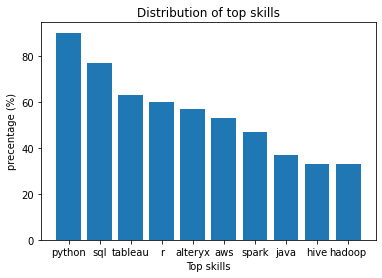

In [129]:
plt.bar(range(len(top_skills)), list(top_skills.values()), align='center')
plt.xticks(range(len(top_skills)), list(top_skills.keys()))
plt.xlabel("Top skills")
plt.ylabel("precentage (%)")
plt.title('Distribution of top skills')